In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
plt.style.use("fivethirtyeight")
%matplotlib inline
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression


In [7]:

os.chdir(r'C:\Users\admin')

In [11]:
datatype={'key':'object','fare_amount':"float64","pickup_datetime":"object",
         "pickup_longitude":"float64","pickup_latitude":"float64","dropoff_longitude":"float64",
         "dropoff_latitude":"float64","passenger_count":"int64"
         }
df=pd.read_csv('trainasp.csv',low_memory=False,nrows=10**5,dtype=datatype,parse_dates=['pickup_datetime'])
df.drop(['key'],axis=1,inplace=True)
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1


In [10]:
df.shape

(100000, 7)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   fare_amount        100000 non-null  float64            
 1   pickup_datetime    100000 non-null  datetime64[ns, UTC]
 2   pickup_longitude   100000 non-null  float64            
 3   pickup_latitude    100000 non-null  float64            
 4   dropoff_longitude  100000 non-null  float64            
 5   dropoff_latitude   100000 non-null  float64            
 6   passenger_count    100000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1)
memory usage: 5.3 MB


In [13]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,11.354652,-72.494682,39.914481,-72.490967,39.919053,1.673820
std,9.716777,10.693934,6.225686,10.471386,6.213427,1.300171
min,-44.900000,-736.550000,-74.007670,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992041,40.734996,-73.991215,40.734182,1.000000
50%,8.500000,-73.981789,40.752765,-73.980000,40.753243,1.000000
75%,12.500000,-73.966982,40.767258,-73.963433,40.768166,2.000000
max,200.000000,40.787575,401.083332,40.851027,404.616667,6.000000


In [14]:
import calendar
df['pickup_date']=df['pickup_datetime'].dt.date
df['pickup_day']=df['pickup_datetime'].apply(lambda x:x.day)
df['pickup_hour']=df['pickup_datetime'].apply(lambda x:x.hour)
df['pickup_day_of_week']=df['pickup_datetime'].apply(lambda x:calendar.day_name[x.weekday()])
df['pickup_month']=df['pickup_datetime'].apply(lambda x:x.month)
df['pickup_year']=df['pickup_datetime'].apply(lambda x:x.year)
df.head(2)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_date,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15,15,17,Monday,6,2009
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05,5,16,Tuesday,1,2010


In [15]:
df.shape

(100000, 13)

In [16]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day,pickup_hour,pickup_month,pickup_year
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000
mean,11.354652,-72.494682,39.914481,-72.490967,39.919053,1.673820,15.664270,13.495110,6.261230,2011.74389
std,9.716777,10.693934,6.225686,10.471386,6.213427,1.300171,8.677631,6.507434,3.450569,1.86602
min,-44.900000,-736.550000,-74.007670,-84.654241,-74.006377,0.000000,1.000000,0.000000,1.000000,2009.00000
25%,6.000000,-73.992041,40.734996,-73.991215,40.734182,1.000000,8.000000,9.000000,3.000000,2010.00000
50%,8.500000,-73.981789,40.752765,-73.980000,40.753243,1.000000,16.000000,14.000000,6.000000,2012.00000
75%,12.500000,-73.966982,40.767258,-73.963433,40.768166,2.000000,23.000000,19.000000,9.000000,2013.00000
max,200.000000,40.787575,401.083332,40.851027,404.616667,6.000000,31.000000,23.000000,12.000000,2015.00000


###### Summary
->Minimum  fare amount is negative
->Minimum and maximum longitude and latitude look unreal should be between -74 and  41
->Minimum passenger count is 0

In [17]:
#Remove 0 passenger count
#The taxi fare initial charge is $2.5,so we are removing fare amount smaller than this amount

In [18]:
#remove outlier value
df=df[((df['pickup_longitude']> -78)&
      (df['pickup_longitude']<-70))&
      ((df['dropoff_longitude']>-78)&
      (df['dropoff_longitude']<-70))&
      ((df['pickup_latitude']>37)&
      (df['pickup_latitude']<45))&
      ((df['dropoff_latitude']>37)&
      (df['dropoff_latitude']<45))&
      (df['passenger_count']>0)&
      (df['fare_amount']>=2.5)]

In [19]:
#Analyse change in Data
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day,pickup_hour,pickup_month,pickup_year
count,97549.000000,97549.000000,97549.000000,97549.000000,97549.000000,97549.000000,97549.000000,97549.000000,97549.000000,97549.000000
mean,11.354236,-73.975142,40.751032,-73.974017,40.751466,1.680386,15.663000,13.492870,6.264144,2011.743267
std,9.698185,0.043751,0.036181,0.039904,0.037161,1.298536,8.676972,6.505561,3.451690,1.871159
min,2.500000,-75.425388,38.754215,-75.354559,39.296307,1.000000,1.000000,0.000000,1.000000,2009.000000
25%,6.000000,-73.992266,40.736642,-73.991395,40.735762,1.000000,8.000000,9.000000,3.000000,2010.000000
50%,8.500000,-73.982076,40.753531,-73.980437,40.753962,1.000000,16.000000,14.000000,6.000000,2012.000000
75%,12.500000,-73.968287,40.767677,-73.965127,40.768476,2.000000,23.000000,19.000000,9.000000,2013.000000
max,200.000000,-70.140793,43.183332,-72.854940,43.415190,6.000000,31.000000,23.000000,12.000000,2015.000000


In [20]:
#checking for NaN values
df.isnull().sum()

fare_amount           0
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
passenger_count       0
pickup_date           0
pickup_day            0
pickup_hour           0
pickup_day_of_week    0
pickup_month          0
pickup_year           0
dtype: int64

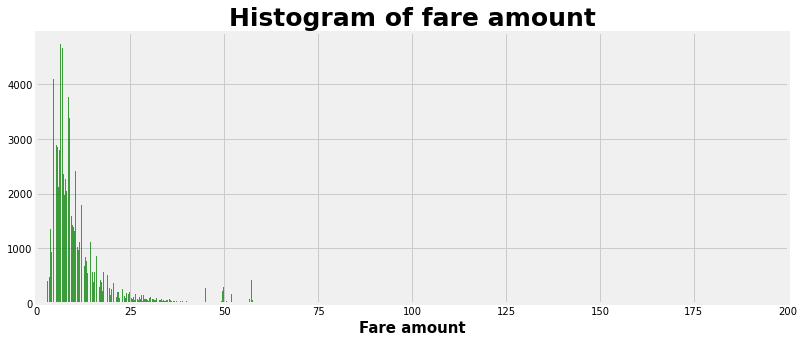

In [21]:
#visualising Target Variable
plt.figure(figsize=(12,5))
n,bins,patches=plt.hist(df.fare_amount,1000,facecolor='green',alpha=0.75)
plt.xlabel('Fare amount',fontsize=15,fontweight='bold')
plt.title('Histogram of fare amount',fontsize=25,fontweight='bold')
plt.xlim(0,200)
plt.show()

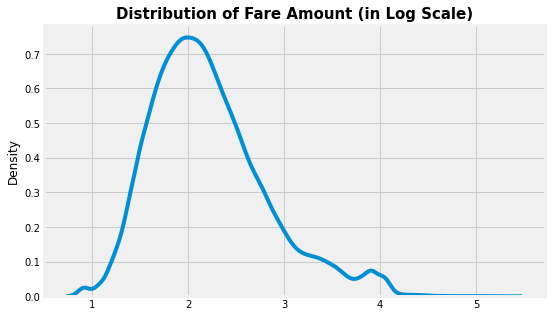

In [22]:
plt.figure(figsize=(8,5))
sns.kdeplot(np.log(df['fare_amount'].values)).set_title("Distribution of Fare Amount (in Log Scale)",
                        fontsize=15,fontweight='bold')
plt.show()

In [23]:
#Analysing Top 5 Fare Amount
df['fare_amount'].value_counts(normalize=True).iloc[:5]

6.5    0.048078
4.5    0.041630
8.5    0.038329
5.3    0.029267
5.7    0.028796
Name: fare_amount, dtype: float64

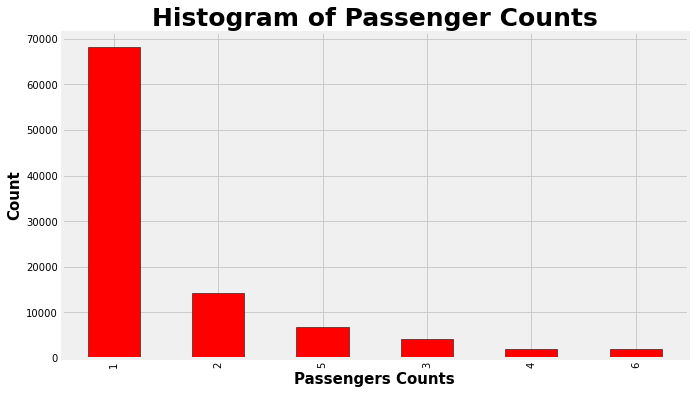

In [24]:
#Passenger Count
plt.figure(figsize=(10,6))
df['passenger_count'].value_counts().plot.bar(color='red',edgecolor='k')
plt.title("Histogram of Passenger Counts",fontsize=25,fontweight="bold")
plt.xlabel("Passengers Counts",fontsize=15,fontweight="bold")
plt.ylabel("Count",fontsize=15,fontweight="bold")
plt.show()


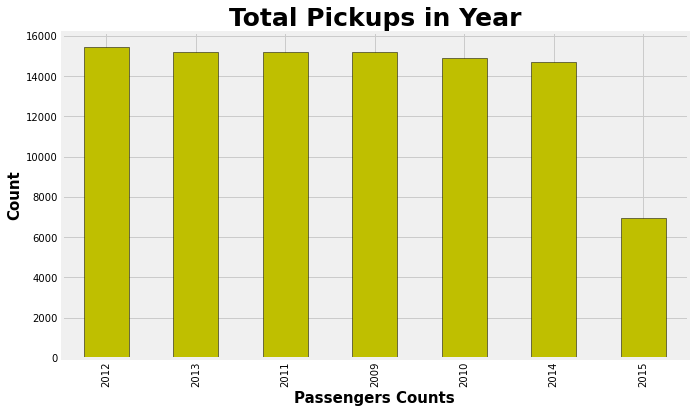

In [25]:
#Total pickup in year
plt.figure(figsize=(10,6))
df['pickup_year'].value_counts().plot.bar(color='y',edgecolor='k')
plt.title("Total Pickups in Year",fontsize=25,fontweight="bold")
plt.xlabel("Passengers Counts",fontsize=15,fontweight="bold")
plt.ylabel("Count",fontsize=15,fontweight="bold")
plt.show()


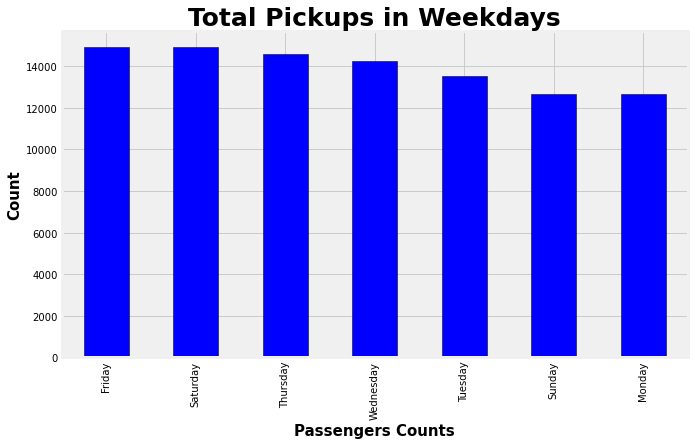

In [26]:
#Total pickup in a week
plt.figure(figsize=(10,6))
df['pickup_day_of_week'].value_counts().plot.bar(color='b',edgecolor='k')
plt.title("Total Pickups in Weekdays",fontsize=25,fontweight="bold")
plt.xlabel("Passengers Counts",fontsize=15,fontweight="bold")
plt.ylabel("Count",fontsize=15,fontweight="bold")
plt.show()


In [27]:
#Analysing Number of Passengers
df['passenger_count'].value_counts()

1    68120
2    14293
5     6876
3     4214
4     2042
6     2004
Name: passenger_count, dtype: int64

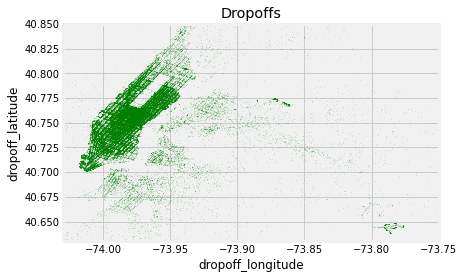

In [28]:
#Plot Heatmap of Pickups and Dropoffs within New York
city_long_border=(-74.03,-73.75)
city_lat_border=(40.63,40.85)
df.plot(kind='scatter',x="dropoff_longitude",y="dropoff_latitude",
       color="green",s=.02,alpha=.6)
plt.title("Dropoffs")
plt.ylim(city_lat_border)
plt.xlim(city_long_border)
plt.show()

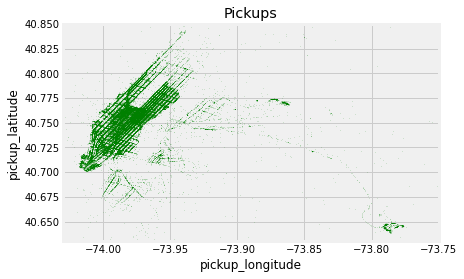

In [29]:
#Plot Heatmap of Pickups and Dropoffs within New York
city_long_border=(-74.03,-73.75)
city_lat_border=(40.63,40.85)
df.plot(kind='scatter',x="pickup_longitude",y="pickup_latitude",
       color="green",s=.02,alpha=.6)
plt.title("Pickups")
plt.ylim(city_lat_border)
plt.xlim(city_long_border)
plt.show()

In [30]:
def distance(lat1,lon1,lat2,lon2):
    p=0.017453292519943295 #Pi/180
    a=0.5-np.cos((lat2-lat1)*p)/2+ np.cos(lat1 * p)*np.cos(lat2 * p)*(1-np.cos((lon2-lon1)*p))/2
    return 0.6213712 * 12742 *np.arcsin(np.sqrt(a))
#add new column to dataframe with distance in miles
df["distance_miles"]=distance(df.pickup_latitude,df.pickup_longitude,
                              df.dropoff_latitude,df.dropoff_longitude)
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_date,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year,distance_miles
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15,15,17,Monday,6,2009,0.640487
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05,5,16,Tuesday,1,2010,5.250670
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-18,18,0,Thursday,8,2011,0.863411
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21,21,4,Saturday,4,2012,1.739386
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09,9,7,Tuesday,3,2010,1.242218


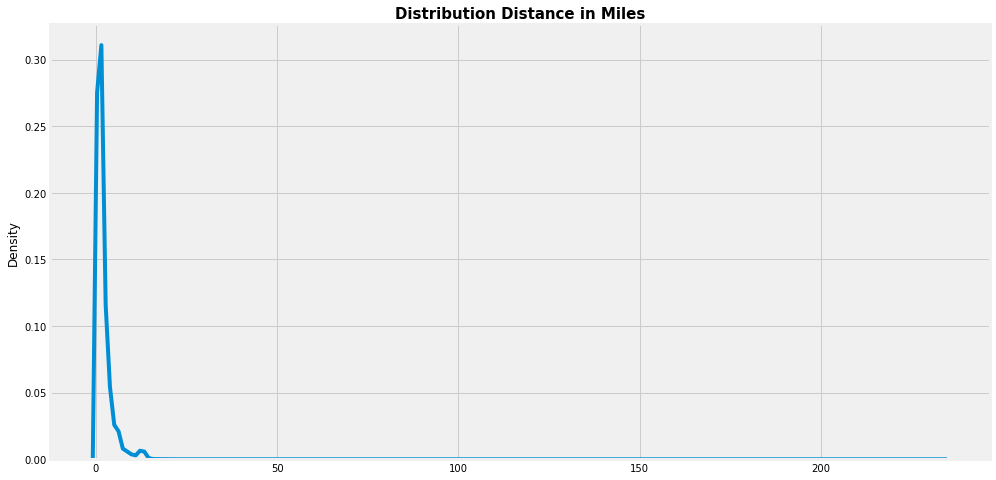

In [31]:
plt.figure(figsize=(15,8))
sns.kdeplot(df["distance_miles"].values).set_title(
"Distribution Distance in Miles",fontsize=15,fontweight="bold")
plt.show()

In [32]:
!pip install folium

In [33]:
import folium
Pickup_Locations=folium.Map(location=[40.767937,-73.982155],tiles="OpenStreetMap",
zoom_start=12)
for each in df[:500].iterrows():
    folium.CircleMarker([each[1]['pickup_latitude'],each[1]['pickup_longitude']],
                       radius=3,
                       color="blue",
                       popup=str(each[1]['pickup_latitude'])+','+str(each[1]['pickup_longitude']),
                       fill_color="#FD8A6C"
                       ).add_to(Pickup_Locations)
Pickup_Locations

In [34]:
import folium
Dropoff_Locations=folium.Map(location=[40.767937,-73.982155],tiles="OpenStreetMap",
zoom_start=12)
for each in df[:500].iterrows():
    folium.CircleMarker([each[1]['dropoff_latitude'],each[1]['dropoff_longitude']],
                       radius=3,
                       color="red",
                       popup=str(each[1]['dropoff_latitude'])+','+str(each[1]['dropoff_longitude']),
                       fill_color="#FD8A6C"
                       ).add_to(Dropoff_Locations)
Dropoff_Locations

In [35]:
df_final=df.copy()
df_final.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_date,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year,distance_miles
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15,15,17,Monday,6,2009,0.640487
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05,5,16,Tuesday,1,2010,5.250670
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-18,18,0,Thursday,8,2011,0.863411
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21,21,4,Saturday,4,2012,1.739386
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09,9,7,Tuesday,3,2010,1.242218


In [36]:
#Inputting Categorical Values
Variables={"Monday":1,"Tuesday":2,"Wednesday":5,"Thursday":3,"Friday":7,"Saturday":4,"Sunday":6}
year={2012: 1, 2013: 2, 2011: 3, 2009: 4, 2010: 5, 2014: 6, 2015: 7}
df_final["pickup_year"]=df_final["pickup_year"].map(year)
df_final["pickup_day_of_week"]=df_final["pickup_day_of_week"].map(Variables)
df_final.drop(["pickup_datetime","pickup_date"],axis=1,inplace=True)
df_final.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year,distance_miles
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,15,17,1,6,4,0.640487
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,5,16,2,1,5,5.250670
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,18,0,3,8,3,0.863411
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,21,4,4,4,1,1.739386
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,9,7,2,3,5,1.242218


In [37]:
from sklearn.model_selection import train_test_split

X=df_final.drop(["fare_amount"],axis=1)
y=df_final[["fare_amount"]]

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=42)

In [38]:
print("Shape of X_train : ",X_train.shape)
print("Shape of X_test : ",X_test.shape)
print("Shape of y_train : ",y_train.shape)
print("Shape of y_test : ",y_test.shape)

Shape of X_train :  (68284, 11)
Shape of X_test :  (29265, 11)
Shape of y_train :  (68284, 1)
Shape of y_test :  (29265, 1)


## Linear Regression Model

In [39]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

from sklearn.metrics import mean_squared_error

print("Test RMSE: %.3f" % mean_squared_error(y_test,y_pred)**0.5)

Test RMSE: 7.037


## Random Forest Regression

In [40]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(max_depth=5,random_state=0, n_estimators=200)
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)

print("Test RMSE: %.3f" % mean_squared_error(y_test,y_pred)**0.5)

Test RMSE: 4.606


In [41]:
import pickle
#save the trained model as a pickle string
pickle.dump(rf,open('rf', 'wb'))

## Final Application

In [42]:
import folium
Enter_Coordinates=folium.Map(location=[40.767937,-73.982155],tiles="OpenStreetMap",
                            zoom_start=12)
popup=folium.LatLngPopup()
popup=folium.ClickForMarker()

#folium.LatLngPopup().add_to(Enter_Coordinates)
Enter_Coordinates.add_child(popup)

Enter_Coordinates


In [43]:
Pickup_Finder=folium.Map(location=[40.767937,-73.982155],tiles="OpenStreetMap",
                            zoom_start=12)
Pickup=[40.744075,-74.003197]
Dropoff=[40.7616,-73.9734]

points=[]
for i in range(len(Pickup)):
    points.append([Pickup[i],Dropoff[i]])
print("Distance between Pickup and Dropoff in miles : ",distance(Pickup[0],Pickup[1],Dropoff[0],Dropoff[1]))

folium.CircleMarker(Pickup,radius=5,color="blue",popup=str([Pickup[0],Pickup[1]]),
                        fill_color="#FD8A6C").add_to(Pickup_Finder)

folium.CircleMarker(Dropoff,radius=5,color="red",popup=str([Dropoff[0],Dropoff[1]]),
                        fill_color="#FD8A6C").add_to(Pickup_Finder)

for index,lat in enumerate(Pickup):
                    folium.Marker([lat,
                                  Dropoff[index]],
                                 icon=folium.Icon(color="green",icon="plus")).add_to(Pickup_Finder)
folium.PolyLine([Pickup,Dropoff],color="green",weight=3,opacity=5).add_to(Pickup_Finder)
                    
Pickup_Finder
                    

Distance between Pickup and Dropoff in miles :  1.9744617137237859


## Let's Predict Taxi Fares

In [47]:
print("Enter your information to predict fare :")
Pickup_Coordinates=str(input("Enter Pickup Coordinates : "))
Drop_off_Coordinates=str(input("Enter Drop-off Coordinates : "))

pickup_latitude=float(Pickup_Coordinates.split(",")[0])
pickup_longitude=float(Pickup_Coordinates.split(",")[1])

drop_off_latitude=float(Drop_off_Coordinates.split(",")[0])
drop_off_longitude=float(Drop_off_Coordinates.split(",")[1])

Enter_Date=input("Enter Date (DD/MM/YEAR) : ")

passenger_count=int(input("Enter number of Passengers : "))

pickup_day=int(Enter_Date.split('/')[0])
pickup_hour=int(input("Enter Hour : "))

pickup_day_of_week=int(input("Enter Week : "))

pickup_month=int(Enter_Date.split('/')[1])
pickup_year=int(Enter_Date.split('/')[2])

distance_miles=distance(pickup_latitude,pickup_longitude,drop_off_latitude,drop_off_longitude)
my_array=np.array([pickup_longitude, pickup_latitude, drop_off_longitude,
                   drop_off_latitude,passenger_count, pickup_day,pickup_hour,
                   pickup_day_of_week, pickup_month, pickup_year, distance_miles])
print("Fare Amount ($)  : ",rf.predict(my_array.reshape(1,-1)))

Enter your information to predict fare :
Enter Pickup Coordinates : 40.5678,-73.9885
Enter Drop-off Coordinates : 41.6790,-70.3451
Enter Date (DD/MM/YEAR) : 12/05/2014
Enter number of Passengers : 3
Enter Hour : 4
Enter Week : 3
Fare Amount ($)  :  [22.2012018]
